### Student Information
Name: 陸柏宏

Student ID: 109164501

GitHub ID: LeafLu0315

Kaggle name: LeafLu

Kaggle private scoreboard snapshot: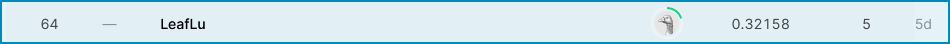

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

### Begin Assignment Here

## First Part

## Ex1

In [ ]:
# Answer here
def countWords(s):
    arr = s.split()
    dic = dict()
    #print(arr)
    for word in arr:
        if(word in dic):
            dic[word] += 1
        else:
            dic[word] = 1
    return dic

def list_to_string(arr):
    s = " "
    return s.join(arr)

dic_train = countWords(list_to_string(train_df['text']))
dic_test = countWords(list_to_string(test_df['text']))

dic_train

In [ ]:
train_top30 = pd.DataFrame(dic_train.items(), columns=['word', 'frequency']).sort_values('frequency', ascending=False).iloc[:30,]
train_top30.plot.bar(x = 'word', y = 'frequency')

In [ ]:
test_top30 = pd.DataFrame(dic_test.items(), columns=['word', 'frequency']).sort_values('frequency', ascending=False).iloc[:30,]
test_top30.plot.bar(x = 'word', y = 'frequency')

## Ex2

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
max_f = 1000
tfidf = TfidfVectorizer(max_features=max_f, tokenizer=nltk.word_tokenize) 
tfidf.fit(train_df['text'])
tfidf_train = tfidf.transform(train_df['text'])
tfidf.get_feature_names()[100:110]

## Ex3

### The confusion matrix calculates how many samples did the computer get wrong or correct.
### The y-axis means that the model predicted and the x-axis means what the sample is true

## Ex4

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_train_pred_NB = clf.predict(X_train)
y_test_pred_NB = clf.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

## Ex5

### The Naive Bayes's acc result is higher than decision tree's
### Decision tree's recall&f1-score in anger&sadness are higher than NB's
### These can see that the probability for the emotion is better than decision tree

## Ex6

In [ ]:
# Answer here
epoch = training_log.iloc[:,0]
acc = training_log.iloc[:,1]
loss = training_log.iloc[:,2]
val_acc = training_log.iloc[:,3]
val_loss = training_log.iloc[:,4]

In [ ]:
plt.plot(acc,'b-',label="Train accuracy")
plt.plot(val_acc,'r-',label="Val accuracy")
plt.legend()
plt.show()

In [ ]:
plt.plot(loss,'b-',label="Train loss")
plt.plot(val_loss,'r-',label="Val loss")
plt.legend()
plt.show()

## Ex7

### We can let the "word" counting with a point and train it

## Ex8

In [ ]:
# Answer here
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Second Part

### Kaggle ID : LeafLu

## Third Part

### The final result is using BoW and TFIDF vector with different max_features and the part of training and testing set
### Below cells are the codes

In [ ]:
import pandas as pd
import json
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Here to read data from the json and because of the size of the json is too large, so I use readline then read as json
def readData(f):
    file = open(f, "r")
    data = file.readlines()
    return data
json_file_name = "tweets_DM.json"
data = readData(json_file_name)
data[0]

In [ ]:
# Put the json text to a list
jsonobj = []
for i in range(len(data)):
    jsonobj.append(json.loads(data[i]))
len(jsonobj)

In [ ]:
# Get familiar with the data
jsonobj[0]

In [ ]:
jsonobj[0]['_source']['tweet']['tweet_id']

In [ ]:
jsonobj[0]['_source']['tweet']['text']

In [ ]:
# get some info to an array
jsonobj_count = len(jsonobj)
arr = []
for i in range(jsonobj_count):
    arr.append({"tweet_id" : jsonobj[i]['_source']['tweet']['tweet_id'],
                     "text" : jsonobj[i]['_source']['tweet']['text'],
                     "score" : jsonobj[i]['_score']})
arr

In [ ]:
# Put them to dataFrame
df = pd.DataFrame()
df = df.append(arr,ignore_index=True)
df

In [ ]:
# read the csvs to dataFrame
identification_path = "data_identification.csv"
emotion_path = "emotion.csv"
identification = pd.read_csv(identification_path)
emotion = pd.read_csv(emotion_path)

In [ ]:
identification

In [ ]:
emotion

In [ ]:
# Merge the data in the original dataFrame
all_df = pd.merge(df,emotion)
all_df

In [ ]:
# Shuffle
all_df = all_df.sample(frac=1)
all_df

In [ ]:
# Get how many part of original dataset to be training set
percentage = 0.9
train_df,test_df = np.split(all_df,[int(percentage*len(all_df))])

In [ ]:
train_df

In [ ]:
test_df

In [ ]:
# Create a predict dataFrame
predict_id = []
for i in range(len(identification)):
    if(identification['identification'][i] == 'test'):
        predict_id.append(identification['tweet_id'][i])
predict_id

In [ ]:
df_predict = pd.DataFrame(predict_id,columns=['tweet_id'])
df_predict['identification'] = 'test'
df_predict

In [ ]:
predict_df = pd.merge(df,df_predict)
predict_df['emotion'] = ""
predict_df

In [ ]:
# Starting BoW
BOW_vectorizer = CountVectorizer()
BOW_vectorizer.fit(train_df['text'])
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])
train_data_BOW_features

In [ ]:
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

In [ ]:
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

In [ ]:
"😂" in feature_names_500

In [ ]:
# Try about TIDF
from sklearn.feature_extraction.text import TfidfVectorizer

max_f = 2000
TFIDF_1000 = TfidfVectorizer(max_features=max_f, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

## check dimension
train_data_TFIDF_features_1000.shape

In [ ]:
# Training
import nltk
max_f = 4000
BOW_500 = CountVectorizer(max_features=max_f, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])
train_data_BOW_features_500.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
# X_train = BOW_500.transform(train_df['text'])
X_train = TFIDF_1000.transform(train_df['text'])
y_train = train_df['emotion']

In [ ]:
# X_test = BOW_500.transform(test_df['text'])
X_test = TFIDF_1000.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

In [ ]:
# predict_train = BOW_500.transform(predict_df['text'])
predict_train = TFIDF_1000.transform(predict_df['text'])
predict_train_res = DT_model.predict(predict_train)
predict_train_res[:10]

In [ ]:
predict_df['tweet_id'][0]

In [ ]:
## Write to csv
import csv
with open('test.csv',"w",newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['id','emotion'])
    for i in range(len(predict_train_res)):
        writer.writerow([predict_df['tweet_id'][i],predict_train_res[i]])